## data loader

In [1]:
process = "lu.C.16"
duration = "100ms"

DATASET = "/home/sx/MPI_profile/"+ process + "/" + duration + "/node_feature.csv"
TOPOLOGY = "/home/sx/MPI_profile/"+ process + "/" + duration + "/graph_edge"

# DATASET = "/home/sx/MPI_profile/lu.B.x/250000000/node_feature.csv"
# TOPOLOGY = "/home/sx/MPI_profile/lu.B.x/250000000/graph_edge"


def data_load(): 
    data = pd.read_csv(DATASET, header=[0,1])
    data.columns.names = ['metric', 'host']
    tempm = data.stack()
    tempm = (tempm-tempm.mean())/(tempm.std())
    metric = tempm.unstack().swaplevel('metric','host',axis=1).stack().unstack()


    edge_data = pd.read_csv(TOPOLOGY, header=0)
    # edge_data = edge_data.groupby(['ts_id','src', 'dst']).agg({'commsize': 'sum'}).reset_index()
    edge_data = edge_data.groupby(['src', 'dst']).agg({'commsize': 'sum'}).reset_index()

    edge_index = edge_data[['src', 'dst']].values.T.tolist()
    edge_weight = edge_data['commsize'].values.tolist()

    # print("metric:")
    # print(metric)

    print("Edge Index:")
    print(edge_index)

    # print("Edge Weight:")
    # print(edge_weight)

    return metric, edge_index

from graphlstm_vae_ad import GraphLSTM_VAE_AD
import pandas as pd
import numpy as np

metric, edge_index = data_load()


Edge Index:
[[0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 6, 7, 7, 7, 8, 8, 8, 9, 9, 9, 9, 10, 10, 10, 10, 11, 11, 11, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15], [1, 4, 0, 2, 5, 1, 3, 6, 2, 7, 0, 5, 8, 1, 4, 6, 9, 2, 5, 7, 10, 3, 6, 11, 4, 9, 12, 5, 8, 10, 13, 6, 9, 11, 14, 7, 10, 15, 8, 13, 9, 12, 14, 10, 13, 15, 11, 14]]


## 加载数据与模型

In [2]:
print(len(metric))

724


In [5]:
# model = GraphLSTM_VAE_AD(sequence_length=120, gpu=1)
model = GraphLSTM_VAE_AD(name="luC16_100ms", sequence_length=30, hidden_dim=8, batch_size=32, lr=1e-3, num_epochs=500)

## 训练模型

Epoch [59/500], Iter [8/8], total_loss: 11790.2041, recon_loss: 11755.3057, kl_loss: 34.8980
valid_loss: [14073.564778645834, 14067.255208333334, 13992.606770833334, 13926.681315104166, 13843.491861979166, 13788.051106770834, 13650.169270833334, 13637.497721354166, 13583.010416666666, 13518.833984375, 13429.607421875, 13355.3671875, 13406.165690104166, 13195.39453125, 13243.912109375, 13075.464192708334, 12926.040364583334, 12811.6015625, 12789.5537109375, 12925.071940104166, 12788.353841145834, 12685.173177083334, 12491.618489583334, 12522.248697916666, 12541.221028645834, 12408.446614583334, 12397.4482421875, 12376.3330078125, 12426.186848958334, 12379.434244791666, 12336.878255208334, 12280.345052083334, 12356.715494791666, 12331.465494791666, 12231.934244791666, 12292.0869140625, 12236.1083984375, 12179.2685546875, 12290.110677083334, 12236.0087890625, 12326.035807291666, 12251.2255859375, 12273.523111979166, 12139.8173828125, 12234.488932291666, 12223.228190104166, 12216.020833333

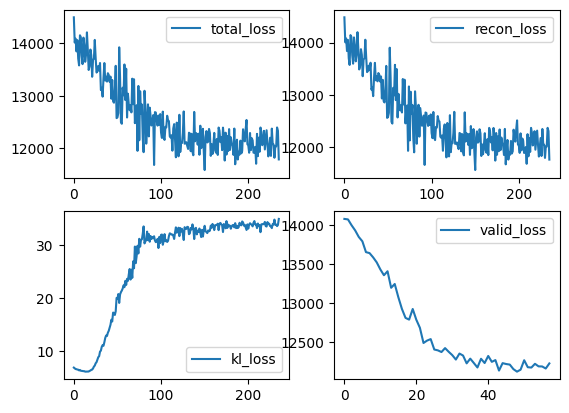

100%|██████████| 3/3 [00:01<00:00,  1.67it/s]


In [5]:
model.fit(metric, 27, edge_index, log_step=2, patience=10)

In [6]:
model.load(16, metric.shape[1])

In [7]:
scores_sum = []
scores_max = []
outputs = []
scores_sum, scores_max, outputs = model.predict(metric, 16, edge_index, 20)

  0%|          | 0/22 [00:00<?, ?it/s]

  0%|          | 0/22 [02:45<?, ?it/s]


KeyboardInterrupt: 

In [26]:
mylog = open('output.txt', mode = 'a',encoding='utf-8')
for i in range(len(outputs)):
    print(outputs[i], file=mylog)
mylog.close()
# df_outputs = pd.DataFrame(data=outputs)
# df_outputs.to_csv('outputs.csv')
# print(outputs)

In [28]:
mylog = open('scores_max.txt', mode = 'a',encoding='utf-8')
for i in range(len(scores_max)):
    print(scores_max[i], file=mylog)
mylog.close()